In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Dataset Link https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:
    

Generate a frequency table for the product category.

Which are the top 5 most listed product categories?

In [11]:
frequency_table = df['category'].value_counts().head(5)
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

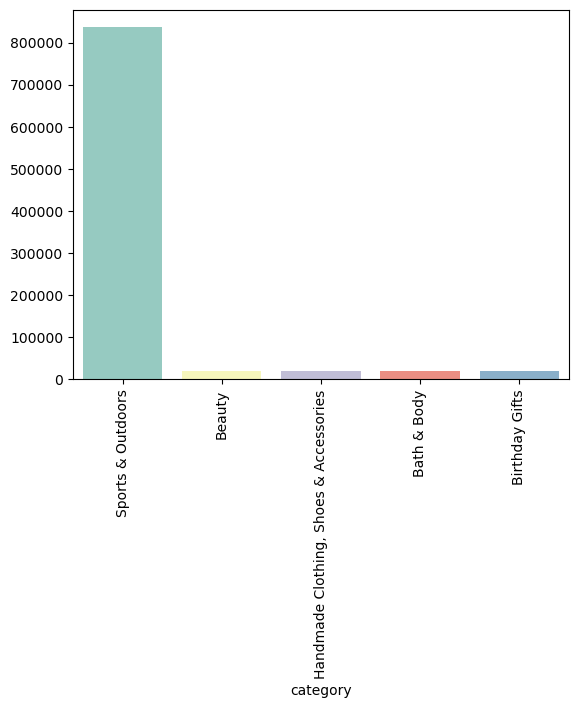

In [16]:
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")
plt.xticks(rotation=90);

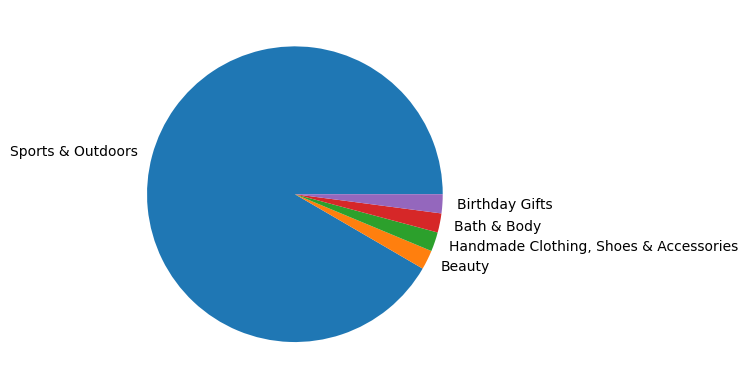

In [18]:
plt.pie(frequency_table,labels=frequency_table.index)
plt.show() 

# Sports & Outdoors dominate the listings.

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?


Measures of Centrality:


Calculate the mean, median, and mode for the price of products.

What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [22]:
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

print(f'''The mean of prices is: {price_mean}
The median price is: {price_median}
The mode of price is: {price_mode}''')

# Average price is much higher than the mode.

The mean of prices is: 89.24380943923663
The median price is: 19.09
The mode of price is: 9.99


Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.

How varied are the product prices? Are there any indicators of a significant spread in prices?

In [24]:
price_variance = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_q_range = df['price'].quantile(0.75)-df['price'].quantile(0.25)


print(f'''The variance of prices is: {price_variance}
The standard deviation price is: {price_std}
The range of price is: {price_range}
The interquartile range is: {price_q_range}''')

# Prices are varied and spread apart.

The variance of prices is: 119445.48532256528
The standard deviation price is: 345.60886175352226
The range of price is: 100000.0
The interquartile range is: 36.0


Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price', ylabel='Count'>

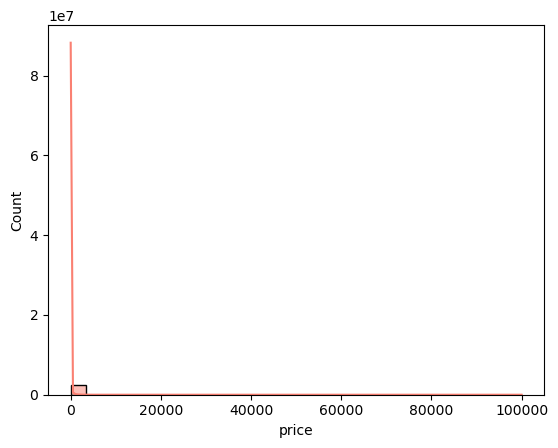

In [25]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

# Prices are too spread apart. A possible solution would be to create 'containers' based on price ranges.

In [26]:
cut_price = pd.DataFrame(pd.cut(
    df['price'],bins=[0,10,20,30,40,50,60,70,80,90,100,500,1000,10000,1000000]).value_counts()
                         .sort_index()).reset_index()

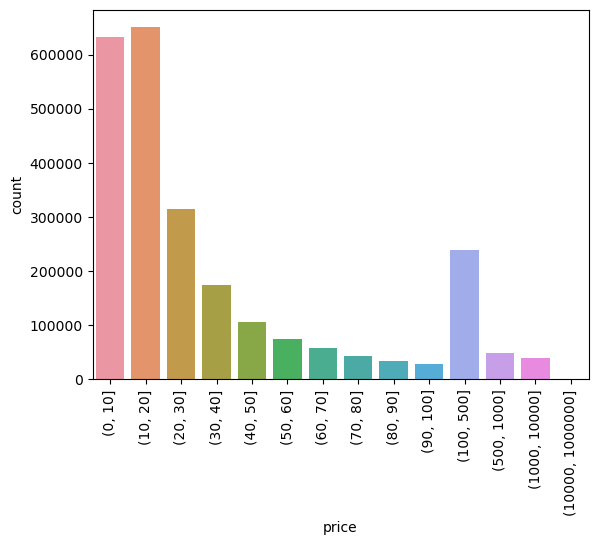

In [28]:
sns.barplot(cut_price,x='price',y='count')
plt.xticks(rotation=90);

<Axes: >

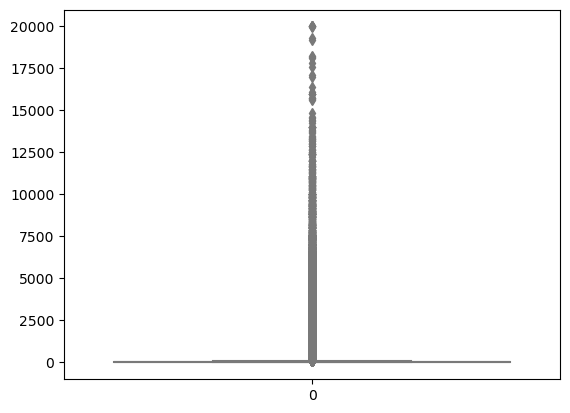

In [39]:
box_plot_filter = df[df['price']<20000]
sns.boxplot(data = box_plot_filter['price'], color="lightblue")

# Further filtering is required.

<Axes: >

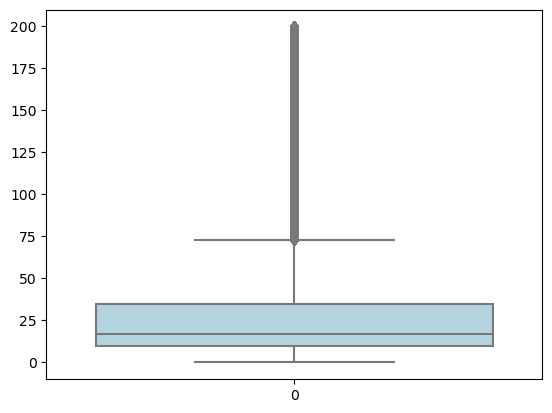

In [41]:
box_plot_filter = df[df['price']<200]
sns.boxplot(data = box_plot_filter['price'], color="lightblue")

Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.

How do customers generally rate products? Is there a common trend?

In [43]:

stars_mean = df['stars'].mean()
stars_median = df['stars'].median()
stars_mode = df['stars'].mode()[0]

print(f'''The mean of stars is: {stars_mean}
The median stars is: {stars_median}
The mode of stars is: {stars_mode}''')
 

The mean of stars is: 2.152836472966065
The median stars is: 0.0
The mode of stars is: 0.0


In [48]:
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]

In [49]:
stars_mean = df_bought['stars'].mean()
stars_median = df_bought['stars'].median()
stars_mode = df_bought['stars'].mode()[0]

print(f'''The mean of stars is: {stars_mean}
The median stars is: {stars_median}
The mode of stars is: {stars_mode}''')

# Calculate statistics only where values above 0 are available.

The mean of stars is: 4.31916076222691
The median stars is: 4.4
The mode of stars is: 4.5


Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.

Are the ratings consistent, or is there a wide variation in customer feedback?

In [50]:
df.loc[((df['reviews']>0) &(df['stars']==0))]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category


In [51]:
print(f"""Variance {df['stars'].var()},standard deviation {df['stars'].std()},
range {df['stars'].max()-df['stars'].min()}, IQR {df['stars'].quantile(0.75)-df['stars'].quantile(0.25)} """)

Variance 4.81743402976196,standard deviation 2.1948653785054697,
range 5.0, IQR 4.4 


In [52]:
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]
print(f"""Variance {df_bought['stars'].var()},standard deviation {df_bought['stars'].std()},
range {df_bought['stars'].max()-df_bought['stars'].min()}, IQR {df_bought['stars'].quantile(0.75)-df_bought['stars'].quantile(0.25)} """)

Variance 0.3083433752380519,standard deviation 0.5552867504614637,
range 4.0, IQR 0.5 


Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.

Are the ratings normally distributed, or do they lean towards higher or lower values?

In [53]:
df['stars'].value_counts().head()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
Name: count, dtype: int64

In [54]:
print(f"Skewness {df['stars'].skew()}, kurtosis {df['stars'].kurtosis()}")

Skewness 0.08120735761080985, kurtosis -1.9260061280432985


In [55]:
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]
print(f"Skewness {df_bought['stars'].skew()}, kurtosis {df_bought['stars'].kurtosis()}")

Skewness -2.3795681122127945, kurtosis 9.78193769066435


Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: >

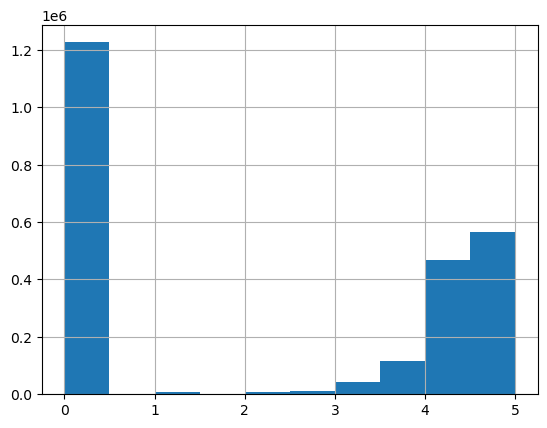

In [56]:
df['stars'].hist()

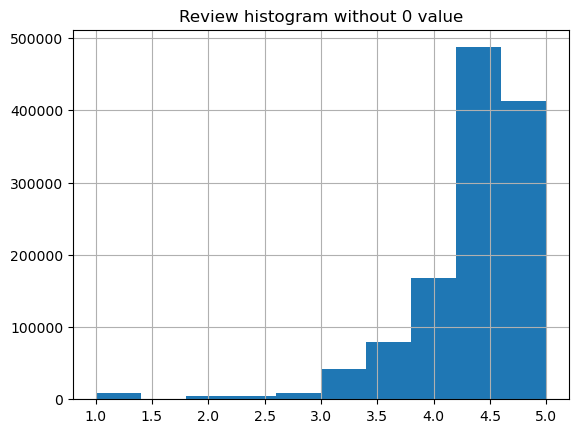

In [57]:
df_bought['stars'].hist()
plt.title('Review histogram without 0 value');